# Introduction to Data Science
## Homework 5

Student Name: Pavel Gladkevich

Student Netid: N16902345
***

### Part 1: Naive Bayes (5 Points)

1\. From your reading you know that the naive Bayes classifier works by calculating the conditional probabilities of each feature, $e_i$, occuring with each class $c$ and treating them independently. This results in the probability of a certain class occuring given a set of features, or a piece of evidence, $E$, as

$$P(c \mid E) = \frac{p(e_1 \mid c) \cdot p(e_2 \mid c) \cdot \cdot \cdot p(e_k \mid c) \cdot p(c)}{p(E)}.$$

The conditional probability of each piece of evidence occuring with a given class is given by

$$P(e_i \mid c) = \frac{\text{count}(e_i, c)}{\text{count}(c)}.$$

In the above equation $\text{count}(e_i, c)$ is the number of documents in a given class that contain feature $e_i$ and $\text{count}(c)$ is the number of documents that belong to class $c$. 

A common variation of the above is to use Laplace (sometimes called +1) smoothing. Recall the use of Laplace smoothing introduced toward the end of Chapter 3 in the section Probability Estimation. This is done in sklearn by setting `alpha=1` in the `BernoulliNB()` function (this is also the default behavior). The result of Laplace smoothing will slightly change the conditional probabilities,

$$P(e_i \mid c) = \frac{\text{count}(e_i, c) + 1}{\text{count}(c) + 2}.$$

In no more than **one paragraph**, describe why this is useful, and use the bias-variance tradeoff to justify its use. Try to think of a case when not using Laplace smoothing would result in "bad" models. Try to give an example. Be precise.

**Answer:**  Laplace smoothing is useful because the pseudo=count that is added to every probability estimate prevents any individual probablity from being 0. When we add a document with a new unkown element/word to the model, $e_i$, prior to the smoothing this would result in the numerator of the conditional probablity: $\text{count}(e_i, c)$ to go to 0. However, with the smoothing we prevent this issue from arising. Because we are altering the probabilities the bias increases, but as a tradeoff we drastically reduce the variance. This prevents our model from over-fitting. 

As an example, if we take a dataset of basketball games where we have so far trained our model on data for team1 vs 4 other teams, where team1 has lost every single game. If we have a new datapoint that has data on a game between team1 and team 5, then with our NB model we are trying to calculate the $P(e_i \mid E)$, or the conditional probability of team 1 winning a game. So far this will be the $\frac{0}{0+4}$, or 0,  since team1 has lost all four matches it has played. This resulted in over-fitting as the true-probability of a team winning a game is never 0. Likewise in our document and classification model the probability of a whole document going to 0 because of one new word is absurd and laplace smoothing is very useful.  

### Part 2: Text classification for sentiment analysis (20 Points)
For this part of the assignment, we are going to use a data set of movie ratings from IMDB.com. The data consists of the text of a movie review and a target variable which tells us whether the reviewer had a positive feeling towards the movie (equivalent to rating the movie between 7 and 10) or a negative feeling (rating the movie between 1 and 4). Neutral reactions are not included in the data.

The first column is the review text; the second is the text label 'P' for positive or 'N' for negative.

1 (1 Point) \. Load the data into a pandas `DataFrame()`.

In [122]:
import pandas as pd
imdb = pd.read_csv('imdb.csv')
imdb = imdb[imdb['Class'].notnull()]
imdb.head()

,Text,Class
0,'One of the first of the best musicals Anchors...,P
1,'Visually disjointed and full of itself the di...,N
2,'These type of movies about young teenagers st...,P
3,'I would rather of had my eyes gouged out with...,N
4,'The title says it all. Tail Gunner Joe was a ...,N


2 (1 Point)\. Code the target variable to be numeric: use the value `1` to represent 'P' and `0` to represent 'N'.

In [123]:
label = {'P' : 1, 'N' : 0}
imdb["Class"] = imdb.Class.replace(label)
imdb

,Text,Class
0,'One of the first of the best musicals Anchors...,1
1,'Visually disjointed and full of itself the di...,0
2,'These type of movies about young teenagers st...,1
3,'I would rather of had my eyes gouged out with...,0
4,'The title says it all. Tail Gunner Joe was a ...,0
...,...,...
8495,'Alright friends a serious movie buff is expec...,0
8496,'I found this film embarrassing to watch. I fe...,0
8497,'To put it simply I am not fond of westerns. A...,0
8498,'Some of these viewer comments are just ridicu...,0


3 (2 Points)\. Put all of the text into a data frame called `X` and the target variable in a data frame called `Y`. Make a train/test split where you give 75% of the data to training. Feel free to use any function from sklearn.

In [124]:
from sklearn.model_selection import train_test_split

X = imdb.Text
Y = imdb.Class.astype(int)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

4 (5 Points)\. Create a binary `CountVectorizer()` and a binary `TfidfVectorizer()`. Use the original single words as well as bigrams (in the same model). Also, use an "english" stop word list. Fit these to the training data to extract a vocabulary and then transform both the train and test data. Hint - look at the API documentation for both vectorizers to see what we mean by "binary."

In [125]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

CV = CountVectorizer(stop_words='english',ngram_range=(1,2), binary=True)
TV = TfidfVectorizer(stop_words='english',ngram_range=(1,2), binary=True)

x_cv_train = CV.fit_transform(x_train)
x_cv_test = CV.transform(x_test)
x_tv_train = TV.fit_transform(x_train)
x_tv_test = TV.transform(x_test)

5 (6 Points)\. Create `LogisticRegression()` and `BernoulliNB()` models. For all settings, keep the default values. In a single plot, show the AUC curve for both classifiers and both vectorizers defined above. In the legend, include the area under the ROC curve (AUC). Do not forget to label your axes. Your final plot will be a single window with 4 curves.

Which model do you think does a better job? Why? Explain in no more than a paragraph.

Extra credit (2 points): Do any of the options perform identically? If so, can you explain why?

In [126]:
# Run this so your plots show properly
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 12

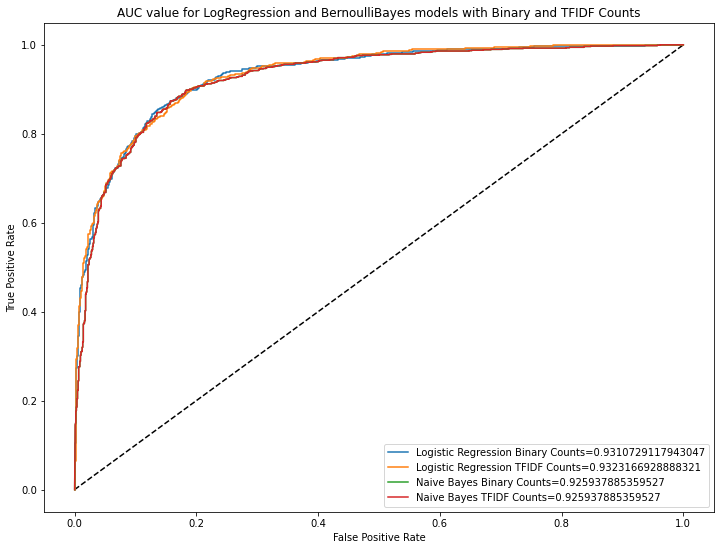

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

aucs = []
logisticRegr = LogisticRegression()
logisticRegr.fit(x_cv_train, y_train)
log_y_pred = logisticRegr.predict_proba(x_cv_test)[:,1]
aucs.append(roc_auc_score(y_test, log_y_pred))
logb_fpr, logb_tpr, t = roc_curve(y_test, log_y_pred)

logisticRegr.fit(x_tv_train, y_train)
log_y_pred = logisticRegr.predict_proba(x_tv_test)[:,1]
aucs.append(roc_auc_score(y_test, log_y_pred))
logt_fpr, logt_tpr, t = roc_curve(y_test, log_y_pred)

bayes = BernoulliNB()
bayes.fit(x_cv_train, y_train)
bayes_y_pred = bayes.predict_proba(x_cv_test)[:,1]
aucs.append(roc_auc_score(y_test, bayes_y_pred))
bayesb_fpr, bayesb_tpr, bayes_thresholds = roc_curve(y_test, bayes_y_pred)

bayes.fit(x_tv_train, y_train)
bayes_y_pred = bayes.predict_proba(x_tv_test)[:,1]
aucs.append(roc_auc_score(y_test, bayes_y_pred))
bayest_fpr, bayest_tpr, bayes_thresholds = roc_curve(y_test, bayes_y_pred)

plt.figure(figsize=(12,9))
plt.plot([0,1], [0,1], 'k--')
plt.plot(logb_fpr, logb_tpr, label=f'Logistic Regression Binary Counts={aucs[0]}')
plt.plot(logt_fpr, logt_tpr, label=f'Logistic Regression TFIDF Counts={aucs[1]}')
plt.plot(bayesb_fpr, bayesb_tpr, label=f'Naive Bayes Binary Counts={aucs[2]}')
plt.plot(bayest_fpr, bayest_tpr, label=f'Naive Bayes TFIDF Counts={aucs[3]}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC value for LogRegression and BernoulliBayes models with Binary and TFIDF Counts')
plt.legend()
plt.show()

**Answer**: Based off of the data I believe that the Logistic Regression with weighted TFIDF counts slightly out-performs the other models. The Naive Bayes models rely on independence assumptions, but conditional indpendence likely does not hold in the case of these reviews. If a segment of text has the word "car", it is more likley that the word "driver" will pop up in the same segment. Similarly, if a reviewer has a strongly negative phrase in their review, it is more likely that they will also have others. Because of this difference, and the slight difference in the AUCs, I believe that the regression models are better suited for the task. Additionally, it makes sense that the TFIDF count logistic regression would be better suited to the task. Weighting words based off of their appearance throughout a single review (term frequency) in relation to the inverse of their appearance across all documents (inverse document frequency) allows for discerning strong sentiment. Reveiwers are unlikely to frequently say they want to "eviscerate the director". Weighting this allows for better predictions. 

**Extra Credit**: The two Naive Bayes models perform exactly identically to eachother, with the same AUC, and even the same ROC curve function. This is because of the Bernoulli Bayes assumption that each feature is assumed to be a binary-valued (Bernoulli, boolean) random variable. Because the TFIDF weights are non-binary they are discarded and replaced with their binary anlogs. From the scikit leanrmodel impelemntation: "a BernoulliNB instance may binarize its input (depending on the binarize parameter)" As a result it appears that the TFIDF counts were replaced with the binary counts and so the two models are identical.

6\. Use the model from question 5 that you think did the best job and predict the rating of the test data. Find 5 examples were labeled positive, but were incorrectly classified as negative. Print out the reviews below and include an explanation as to why you think it may have been incorrectly classified. You can pick any 5. They do not have to be at random.

In [128]:
logisticRegr = LogisticRegression()
logisticRegr.fit(x_tv_train, y_train)
predictions = logisticRegr.predict(x_tv_test)
reviews = np.array(x_test)
labels = np.array(y_test)

In [129]:
import numpy as np
indices = np.where((predictions == 0) & (labels == 1))[0]

for i in indices[0:5]:
    print('---------------------------------------------------------------------------------------------------------')
    print(reviews[i])

---------------------------------------------------------------------------------------------------------
'Since starting to read the book this movie is based on Im having mixed feelings about the filmed result. I learned some time ago to see the movie adaptation of a book before I read the book because I found that if I read the book first I was inevitably disappointed in the film. This would undoubtedly have been true here whereas in the case of Atonement which is probably the best filmed adaptation of a book Ive ever seen it would probably not have mattered. Im trying to figure out what the cause is and I suspect that I have to point my finger squarely at Michael Cunningham. Much as I respect him for The Hours (which I have not read but which I saw and was awed by) I cannot escape the feeling that he not so much adapted Susan Mintons book as he did take a few of the characters and the basic premise and write his own movie out of it. Its not that I dislike the movie. I actually love 

**Answer**: In the first review the author is very conflicted about the movie, which he reviewed with a rating of 9/10 https://www.imdb.com/review/rw1690662/, but believes is an unfaithful adaptation of the novel. There is a lot of negative language in the review such as "inevitably disappointed", so it is unsurpsising that the sentiment would overall be rated negatively despite the strongly positive rating. This would be very difficult for an algorithm to discern as there are a lot of conflicting emotions displayed by the reviewer. 

The second review is 7/10 and https://www.imdb.com/review/rw0679951/?ref_=tt_urv its a little down the middle. The author says some positive things about the movie but the first two sentences are fairly negative on the movie and set the tone. In addition the language isn't as trong for the positives "funny enough". 

The third review is a strongly positive review where the reviewer states, "one of the few movies me and my freinds have been able to keep watching over the years and quote whenever possible. GREAT MOVIE", but because of the negative language surrounding other people's portrayal of this film, and the difficulty in finding the movie it ultimate gets classified as negative.

The fourth review is surpringly negative as the reviewer even says, "one of the greatest movies which are ever made". It seems the only negative portions of the statement are the "... The book is better" which must have been weighed heavily and skewed the review to a false negative.

The last review also contains language that is only negative when talking about other's perceptions of the movie that the reviwer believes are mistakenly negative. It appears in this segment of the misclassified data the main reason for incorrect classification is language critical of the movie from the reviewer's perception of the viewpoint of others. Additionally, in these reviews there are many cases of paraprosdokian, or where the latter portions of the sentence changes the first portion: "The book is better but its still a very good movie!" -Review 3